<a href="https://colab.research.google.com/github/dphents/fastbook/blob/master/Roller_Coaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.6MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 1.0MB 21.7MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 358kB 34.2MB/s 
     |████████████████████████████████| 40kB 3.7MB/s 
     |████████████████████████████████| 40kB 3.8MB/s 
     |████████████████████████████████| 92kB 6.5MB/s 
     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 2.6MB 34.1MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *


In [3]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

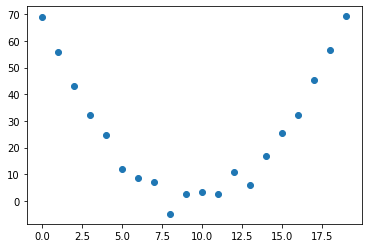

In [7]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [8]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [9]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [10]:
params = torch.randn(3).requires_grad_()

In [11]:
orig_params = params.clone()

In [12]:
preds = f(time, params)

In [13]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

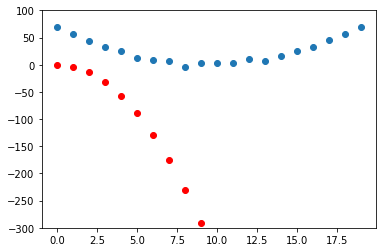

In [14]:
show_preds(preds)

In [15]:
loss = mse(preds, speed)
loss

tensor(392619.1875, grad_fn=<MeanBackward0>)

In [16]:
loss.backward()
params.grad

tensor([-210024.5938,  -13468.9160,    -939.2467])

In [17]:
params.grad * 1e-5

tensor([-2.1002, -0.1347, -0.0094])

In [18]:
params

tensor([-3.5945,  0.0192,  0.1052], requires_grad=True)

In [19]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [20]:
preds = f(time,params)
mse(preds, speed)

tensor(74818.2266, grad_fn=<MeanBackward0>)

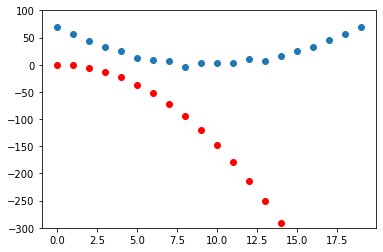

In [21]:
show_preds(preds)

In [22]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [26]:
for i in range(20): apply_step(params)

1147.2413330078125
739.7444458007812
662.6306762695312
648.0353393554688
645.2706298828125
644.7443237304688
644.641845703125
644.6192626953125
644.6122436523438
644.6079711914062
644.6041259765625
644.6004028320312
644.5966796875
644.5931396484375
644.5894775390625
644.5858764648438
644.5819702148438
644.578369140625
644.5747680664062
644.5711059570312


In [27]:
params = orig_params.detach().requires_grad_()

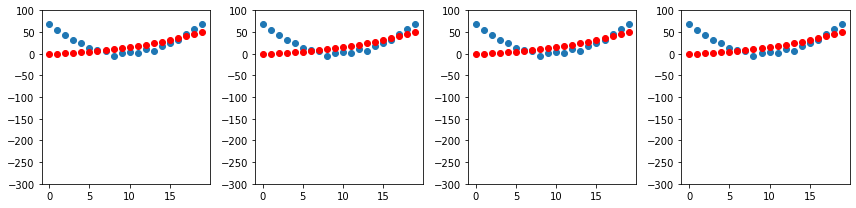

In [28]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()